In [5]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [6]:
"""
FNSPID STOCK PRICE PREPROCESSING
run wget https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_price/full_history.zip in the Data/FNSPID/Stock_price folder, then extract to get raw data (too big to keep)
"""

'\nFNSPID STOCK PRICE PREPROCESSING\nrun wget https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_price/full_history.zip in the Data/FNSPID/Stock_price folder, then extract to get raw data (too big to keep)\n'

In [ ]:
price_folder = "/global/cfs/cdirs/m4431/sp2160/FNSPID/Stock_price/full_history"
csv_files = glob(os.path.join(price_folder, "*.csv"))

print("Number of files found:", len(csv_files))

Number of files found: 7693


In [8]:
all_data = []
for file in csv_files:
    df = pd.read_csv(file)
    # Standardize column names (strip spaces, lower case)
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    # Add ticker (from filename if desired)
    ticker = os.path.basename(file).replace(".csv", "")
    df['ticker'] = ticker
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)
print("Combined DataFrame head:")
display(combined_df.head())

Combined DataFrame head:


,date,volume,open,high,low,close,adj_close,ticker
0,2020-07-02,100.0,19.903999,19.903999,19.903999,19.903999,19.903999,ECLN
1,2020-07-01,300.0,19.520000,19.812000,19.520000,19.812000,19.812000,ECLN
2,2020-06-30,100.0,19.566000,19.566000,19.566000,19.566000,19.566000,ECLN
3,2020-06-29,200.0,19.330000,19.358999,19.330000,19.358999,19.358999,ECLN
4,2020-06-26,100.0,19.167000,19.167000,19.167000,19.167000,19.167000,ECLN


In [9]:
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')
numeric_cols = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

combined_df = combined_df.drop_duplicates().dropna(subset=['date', 'ticker'])
print("After cleaning:")
display(combined_df.head())

After cleaning:


,date,volume,open,high,low,close,adj_close,ticker
0,2020-07-02,100.0,19.903999,19.903999,19.903999,19.903999,19.903999,ECLN
1,2020-07-01,300.0,19.520000,19.812000,19.520000,19.812000,19.812000,ECLN
2,2020-06-30,100.0,19.566000,19.566000,19.566000,19.566000,19.566000,ECLN
3,2020-06-29,200.0,19.330000,19.358999,19.330000,19.358999,19.358999,ECLN
4,2020-06-26,100.0,19.167000,19.167000,19.167000,19.167000,19.167000,ECLN


In [10]:
combined_df = combined_df.sort_values(['ticker', 'date'])
print("Final sorted DataFrame head:")
display(combined_df.head())

combined_df.to_csv("FNSPID/processed_stock_prices.csv", index=False)

Final sorted DataFrame head:


,date,volume,open,high,low,close,adj_close,ticker
26340562,1999-11-18,62546300.0,32.546494,35.765381,28.612303,31.473534,27.068665,A
26340561,1999-11-19,15234100.0,30.713520,30.758226,28.478184,28.880543,24.838577,A
26340560,1999-11-22,6577800.0,29.551144,31.473534,28.657009,31.473534,27.068665,A
26340559,1999-11-23,5975600.0,30.400572,31.205294,28.612303,28.612303,24.607880,A
26340558,1999-11-24,4843200.0,28.701717,29.998211,28.612303,29.372318,25.261524,A


In [11]:
"""
FNSPID NEWS HEADLINE PREPROCESSING
run wget https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_news/nasdaq_exteral_data.csv in the Data/FNSPID/Stock_news folder to get raw data (too big to keep)
"""

'\nFNSPID NEWS HEADLINE PREPROCESSING\nrun wget https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_news/nasdaq_exteral_data.csv in the Data/FNSPID/Stock_news folder to get raw data (too big to keep)\n'

In [13]:
news_file = "FNSPID/Stock_news/nasdaq_exteral_data.csv"
news_df = pd.read_csv(news_file)
print("Initial headline data:")
display(news_df.head())

/tmp/ipykernel_1987515/538703589.py:2: DtypeWarning: Columns (3,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  news_df = pd.read_csv(news_file)


Initial headline data:


,Unnamed: 0,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
0,0.0,2023-12-16 23:00:00 UTC,Interesting A Put And Call Options For August ...,A,https://www.nasdaq.com/articles/interesting-a-...,NaN,NaN,"Investors in Agilent Technologies, Inc. (Symbo...",Because the $125.00 strike represents an appro...,The current analytical data (including greeks ...,Below is a chart showing the trailing twelve m...,"At Stock Options Channel, our YieldBoost formu..."
1,1.0,2023-12-12 00:00:00 UTC,Wolfe Research Initiates Coverage of Agilent T...,A,https://www.nasdaq.com/articles/wolfe-research...,NaN,NaN,"Fintel reports that on December 13, 2023, Wolf...","Fintel reports that on December 13, 2023, Wolf...","T. Rowe Price Investment Management holds 10,1...",Agilent Technologies Declares $0.24 Dividend O...,The projected annual revenue for Agilent Techn...
2,2.0,2023-12-12 00:00:00 UTC,Agilent Technologies Reaches Analyst Target Price,A,https://www.nasdaq.com/articles/agilent-techno...,NaN,NaN,"In recent trading, shares of Agilent Technolog...","In recent trading, shares of Agilent Technolog...","In recent trading, shares of Agilent Technolog...",When a stock reaches the target an analyst has...,When a stock reaches the target an analyst has...
3,3.0,2023-12-07 00:00:00 UTC,Agilent (A) Enhances BioTek Cytation C10 With ...,A,https://www.nasdaq.com/articles/agilent-a-enha...,NaN,NaN,Agilent Technologies A is enhancing its BioTek...,"Per a Grand View Research report, the global m...","Notably, Agilent enhanced the BioTek Cytation ...","Agilent Technologies, Inc. Price and Consensus...","Notably, Agilent enhanced the BioTek Cytation ..."
4,4.0,2023-12-07 00:00:00 UTC,"Pre-Market Most Active for Dec 7, 2023 : SQQQ,...",A,https://www.nasdaq.com/articles/pre-market-mos...,NaN,NaN,The NASDAQ 100 Pre-Market Indicator is up 70.2...,ProShares UltraPro Short QQQ (SQQQ) is -0.15 a...,"As reported by Zacks, the current mean recomme...","The total Pre-Market volume is currently 39,23...",The NASDAQ 100 Pre-Market Indicator is up 70.2...


In [15]:
news_df['date'] = pd.to_datetime(news_df['Date'], errors='coerce')
print("Converted date column:")
display(news_df[['date', 'Article_title', 'Stock_symbol']].head())

Converted date column:


,date,Article_title,Stock_symbol
0,2023-12-16 23:00:00+00:00,Interesting A Put And Call Options For August ...,A
1,2023-12-12 00:00:00+00:00,Wolfe Research Initiates Coverage of Agilent T...,A
2,2023-12-12 00:00:00+00:00,Agilent Technologies Reaches Analyst Target Price,A
3,2023-12-07 00:00:00+00:00,Agilent (A) Enhances BioTek Cytation C10 With ...,A
4,2023-12-07 00:00:00+00:00,"Pre-Market Most Active for Dec 7, 2023 : SQQQ,...",A


In [16]:
output_df = news_df[['Date', 'Article_title', 'Stock_symbol']]
output_df.to_csv("FNSPID/processed_headlines_subset.csv", index=False)

In [17]:
# Stock Prices: Basic Info
print("Number of tickers:", combined_df['ticker'].nunique())
print("Date range:", combined_df['date'].min(), "to", combined_df['date'].max())
print("Total records:", combined_df.shape[0])
print("\nSample 10 tickers:", combined_df['ticker'].unique()[:10])

# Missing Value Check
print("Missing values per column:")
display(combined_df.isnull().sum())

# News Headlines: Basic Info
print("Number of unique stock symbols in headlines:", output_df['Stock_symbol'].nunique())
print("Headlines date range:", output_df['Date'].min(), "to", output_df['Date'].max())
print("Total headlines:", output_df.shape[0])

# Most frequent headline topics
print("Most common keywords in headlines:")
display(output_df['Article_title'].str.split().explode().value_counts().head(20))

Number of tickers: 7693
Date range: 1962-01-02 00:00:00 to 2023-12-28 00:00:00
Total records: 29677722

Sample 10 tickers: ['A' 'AA' 'AAAU' 'AACG' 'AADR' 'AAL' 'AAMC' 'AAME' 'AAN' 'AAOI']
Missing values per column:


date           0
volume       257
open         257
high         257
low          257
close        257
adj_close    257
ticker         0
dtype: int64

Number of unique stock symbols in headlines: 8552
Headlines date range: 1914-09-16 00:00:00 UTC to 2024-01-09 00:00:00 UTC
Total headlines: 15549299
Most common keywords in headlines:


Article_title
to           2945420
-            2281331
of           1960622
in           1834068
for          1693334
and          1581560
on           1303597
the          1151399
The           634592
Announces     624365
at            612804
Stocks        578260
New           566346
Asset         546008
Earnings      544981
Net           526975
a             526530
as            494704
Value(s)      492032
ETF           478337
Name: count, dtype: int64

In [18]:
# Price summary by ticker
price_stats = combined_df.groupby('ticker')[['open', 'close', 'adj_close', 'volume']].agg(['mean', 'std', 'min', 'max'])
display(price_stats.head())

# Daily return stats for one ticker
some_ticker = combined_df['ticker'].unique()[0]
ticker_df = combined_df[combined_df['ticker'] == some_ticker].sort_values('date')
ticker_df['daily_return'] = ticker_df['close'].pct_change()
print(f"Stats for {some_ticker}:")
display(ticker_df[['date', 'close', 'daily_return']].head())

open                                        close             \
             mean        std        min         max       mean        std   
ticker                                                                      
A       48.589043  38.849756   7.653791  179.279999  48.600321  38.837159   
AA      27.622643  24.731182   3.652560  115.007584  27.610737  24.714658   
AAAU    16.964749   2.347684  11.780000   20.540001  16.961280   2.349587   
AACG     4.223343   2.689853   0.690000   16.299999   4.223905   2.701012   
AADR    44.142290  11.149249  24.690001   69.360001  44.132122  11.151117   

                               adj_close                                    \
              min         max       mean        std        min         max   
ticker                                                                       
A        7.761087  179.279999  46.413079  39.166115   6.674886  176.669449   
AA       3.652560  113.782051  21.455469  21.865797   1.082444   98.448433   
AAAU    11.740000   20.590000  16.961280   2.349587  11.740000   20.590000   
AACG     0.670000   17.080000   0.895140   0.801396   0.215793   14.300000   
AADR    24.700001   69.360001  41.786173  11.392063  22.103203   65.897713   

              volume                                       
                mean           std       min          max  
ticker                                                     
A       3.385055e+06  2.410603e+06  271900.0   62546300.0  
AA      2.866623e+06  4.396788e+06       0.0  100751600.0  
AAAU    6.666653e+05  1.026512e+06     100.0   14338200.0  
AACG    1.907364e+05  5.204068e+06       0.0  315842300.0  
AADR    8.547636e+03  1.719955e+04       0.0     323800.0

Stats for A:


,date,close,daily_return
26340562,1999-11-18,31.473534,NaN
26340561,1999-11-19,28.880543,-0.082386
26340560,1999-11-22,31.473534,0.089783
26340559,1999-11-23,28.612303,-0.090909
26340558,1999-11-24,29.372318,0.026563


In [25]:
# Join subset headlines with prices, for analysis
tmp_headlines = output_df.copy()
# Convert to datetime, then extract only the date part (drops time and timezone)
tmp_headlines['Date'] = pd.to_datetime(tmp_headlines['Date'], errors='coerce').dt.date
tmp_headlines['Stock_symbol'] = tmp_headlines['Stock_symbol'].astype(str)

tmp_prices = combined_df[['date', 'ticker', 'close']].copy()
# Convert to date only (without time or tz)
tmp_prices['date'] = pd.to_datetime(tmp_prices['date'], errors='coerce').dt.date
tmp_prices['ticker'] = tmp_prices['ticker'].astype(str)

# Now you can merge on pure date plus ticker
tmp_joined = pd.merge(
    tmp_headlines,
    tmp_prices,
    left_on=['Date', 'Stock_symbol'],
    right_on=['date', 'ticker'],
    how='left'
)

print("Headlines matched to closing prices (sample):")
display(tmp_joined[['Date', 'Stock_symbol', 'Article_title', 'close']].head(20))

Headlines matched to closing prices (sample):


,Date,Stock_symbol,Article_title,close
0,2023-12-16,A,Interesting A Put And Call Options For August ...,NaN
1,2023-12-12,A,Wolfe Research Initiates Coverage of Agilent T...,128.789993
2,2023-12-12,A,Agilent Technologies Reaches Analyst Target Price,128.789993
3,2023-12-07,A,Agilent (A) Enhances BioTek Cytation C10 With ...,128.679993
4,2023-12-07,A,"Pre-Market Most Active for Dec 7, 2023 : SQQQ,...",128.679993
5,2023-12-05,A,A Quantitative Stock Analysis,127.879997
6,2023-11-24,A,"The Zacks Analyst Blog Highlights Visa, Marrio...",126.620003
7,2023-11-22,A,3 Biotech Stocks With Big-Time Breakthrough Po...,123.989998
8,2023-11-22,A,"Top Research Reports for Visa, Marriott Intern...",123.989998
9,2023-11-21,A,"Tuesday Sector Leaders: Healthcare, Consumer P...",123.919998


In [26]:
# Number of headlines per year
output_df['year'] = pd.to_datetime(output_df['Date']).dt.year
headline_count_by_year = output_df.groupby('year').size()
print("Headline count per year:")
display(headline_count_by_year)

# Top stocks by headline volume
top_stock_symbols = output_df['Stock_symbol'].value_counts().head(20)
print("Top 20 stocks by headline count:")
display(top_stock_symbols)

/tmp/ipykernel_1987515/2341158113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['year'] = pd.to_datetime(output_df['Date']).dt.year


Headline count per year:


year
1914          5
1969          1
1999       3081
2000      16176
2001      21974
2002      22179
2003      21557
2004      24386
2005      30718
2006      36057
2007     464439
2008    1056009
2009     961342
2010    1211112
2011    1586808
2012    1605474
2013    1259792
2014    1256672
2015    1471301
2016     817956
2017     515523
2018     698590
2019     700151
2020     351832
2021     181623
2022     280354
2023     954117
2024         70
dtype: int64

Top 20 stocks by headline count:


Stock_symbol
GILD     12376
NVDA     11862
QQQ      11813
BABA     11625
WFC      11301
INTC     11157
MRK      10774
TSLA     10587
KO       10521
BROGW    10456
BPYPO     9979
GOOG      9930
DIS       9654
BHFAL     9614
MU        9605
T         9463
MS        9458
AAPL      9338
AMD       9209
PMAY      9108
Name: count, dtype: int64

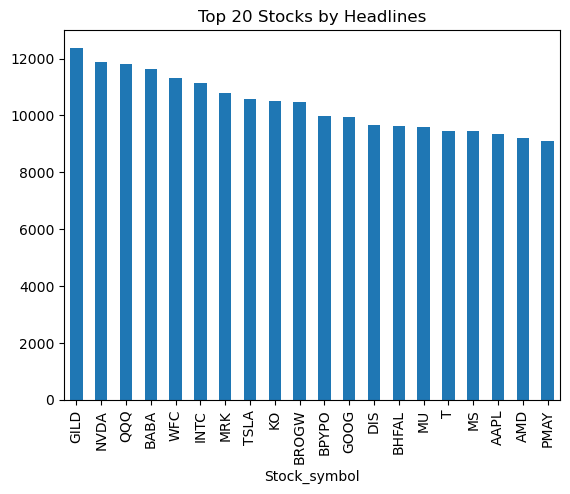

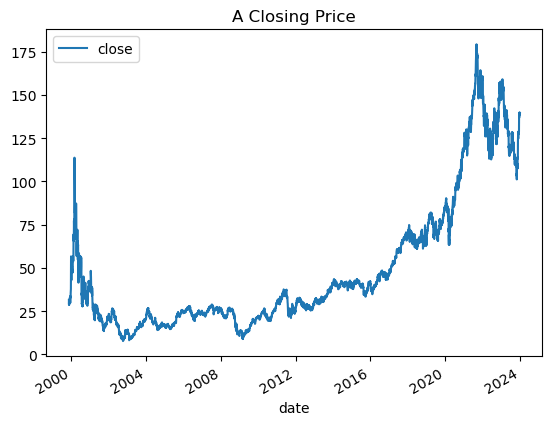

In [27]:
# Distribution of headlines per ticker
output_df['Stock_symbol'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Stocks by Headlines")
plt.show()

# Stock closing price for sample ticker over time
sample_ticker = combined_df['ticker'].unique()[0]
combined_df[combined_df['ticker'] == sample_ticker].plot(x='date', y='close', title=f"{sample_ticker} Closing Price")
plt.show()